In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab2/dataset.csv")

In [ ]:
display(df)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55697,55676,F,NaN,170,NaN,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55698,55681,F,NaN,160,NaN,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55699,55683,F,NaN,160,NaN,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55700,55684,M,NaN,165,NaN,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


Question 1.1 :  
Les différentes colonnes (27) sont les différentes caracréristiques physilogiques de différents individus (Genre, âge, taille, poids vue audition, analyse d'urine et sanguine, dentition, fumeur ou non).

Il y a 55702 entrées dans le jeu de donné (5 individus)




In [ ]:
df.isnull()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55697,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55698,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55699,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55700,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

ID                     0
gender                 0
age                    6
height(cm)             0
weight(kg)             6
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

Question 1.1 : Il y a 12 entrée ayant des valeurs Null

<Axes: title={'center': 'Smoke'}, ylabel='Frequency'>

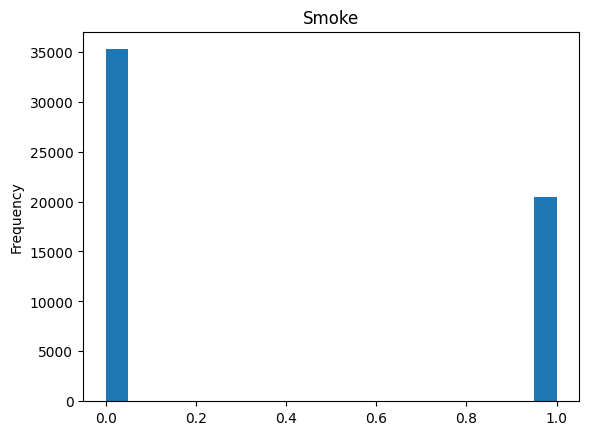

In [ ]:
df['smoking'].plot(kind='hist', bins=20, title='Smoke')

In [ ]:
dff=df[df['smoking']==1]

print("La moyenne d'âge des fumeurs est de : " + str(dff['age'].mean()) +' ans')
print("La taille moyenne des fumeurs est de : " + str(dff['height(cm)'].mean()) +' cm')
print("Le poid moyen des fumeurs est de : " + str(dff['weight(kg)'].mean()) +' kg')

La moyenne d'âge des fumeurs est de : 43.560813453265546 ans
La taille moyenne des fumeurs est de : 169.4354010852031 cm
Le poid moyen des fumeurs est de : 70.95937622213532 kg


<Axes: >

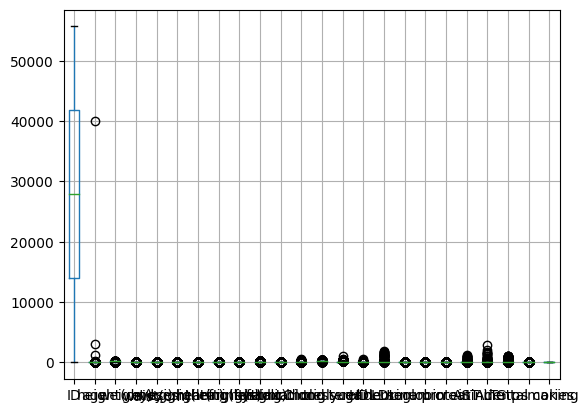

In [ ]:
df.boxplot()

In [ ]:
df_ab_age=df[df['age']>80]
display(df_ab_age)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
2599,3267,F,85.0,145,50.0,78.0,0.6,0.7,1.0,2.0,...,14.7,1.0,0.6,22.0,8.0,12.0,Y,1,Y,0
4342,5470,M,85.0,160,65.0,92.9,0.7,1.0,1.0,1.0,...,15.3,1.0,1.1,28.0,25.0,36.0,Y,0,N,0
5246,6612,M,85.0,165,70.0,90.0,0.6,0.8,1.0,1.0,...,12.7,1.0,0.8,44.0,26.0,43.0,Y,0,N,0
11310,14152,M,85.0,155,45.0,72.0,0.5,0.1,1.0,1.0,...,12.8,1.0,1.5,31.0,10.0,21.0,Y,0,N,0
15959,19901,M,85.0,165,70.0,95.0,0.1,0.3,2.0,2.0,...,11.8,1.0,1.0,24.0,15.0,20.0,Y,0,N,0
16394,20435,M,85.0,155,55.0,86.0,0.9,0.4,1.0,1.0,...,14.1,1.0,0.8,23.0,11.0,20.0,Y,0,N,1
17822,22240,M,85.0,160,65.0,89.0,0.9,1.2,1.0,1.0,...,14.5,1.0,1.1,20.0,15.0,26.0,Y,0,N,0
24345,30402,M,85.0,165,70.0,94.0,0.1,0.6,2.0,2.0,...,16.4,1.0,0.9,30.0,18.0,74.0,Y,0,N,0
26913,33567,F,85.0,145,40.0,83.0,0.2,0.3,1.0,1.0,...,10.1,1.0,1.1,51.0,42.0,20.0,Y,0,N,0
31166,38935,M,85.0,150,50.0,84.5,0.4,0.7,2.0,2.0,...,12.3,1.0,1.2,33.0,12.0,18.0,Y,0,N,0


Il y a 4 personne dont l'âge est abérrant :


*   180 ans
*   1200 ans
*   3000 ans
*   40 000 ans









In [ ]:
ecart_type=df['hemoglobin'].std()
print("L'écart type pour l'hémoglobine est : " + str(ecart_type))

L'écart type pour l'hémoglobine est : 1.5644757507736968


<Axes: title={'center': 'Smoke'}, ylabel='Frequency'>

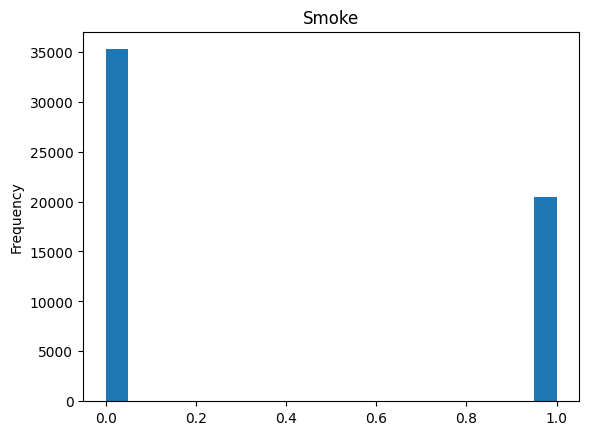

In [ ]:
df['smoking'].plot(kind='hist', bins=20, title='Smoking proportion')

Mon ordinateur n'arrive à afficher un pie chart donc voici tout de même un histogramme

Pour les hommes:

smoking
1    19598
0    15807
Name: count, dtype: int64


<Axes: title={'center': 'Smoking proportion Male'}, ylabel='Frequency'>

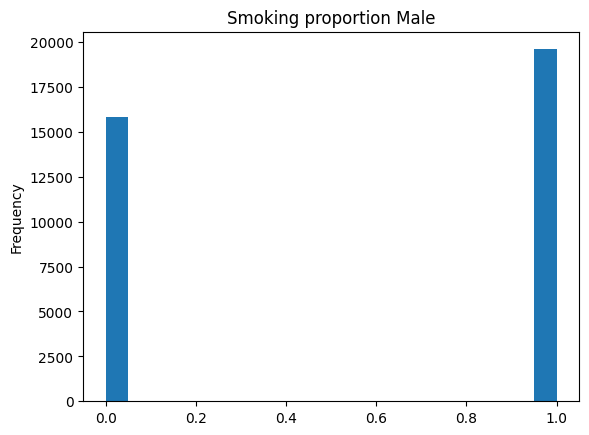

In [ ]:
df_Male_S=df[df['gender']=='M']
print(df_Male_S['smoking'].value_counts())
df_Male_S['smoking'].plot(kind='hist', bins=20, title='Smoking proportion Male')

Pour les femmes:



smoking
1    19598
0    15807
Name: count, dtype: int64


<Axes: title={'center': 'Smoking proportion Female'}, ylabel='Frequency'>

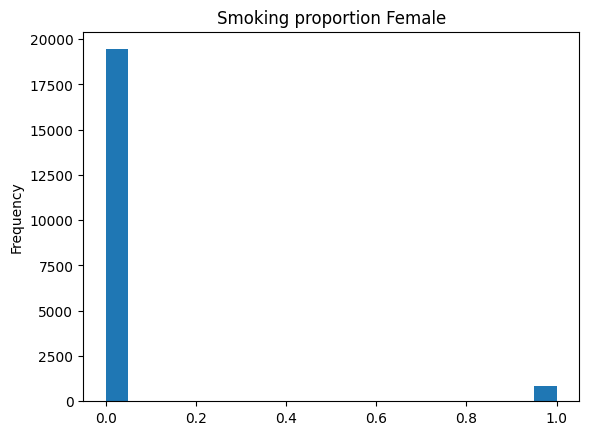

In [ ]:
df_Female_S=df[df['gender']=='F']
print(df_Male_S['smoking'].value_counts())
df_Female_S['smoking'].plot(kind='hist', bins=20, title='Smoking proportion Female')

In [ ]:
df_Male_TrueS=df_Male_S[df_Male_S["smoking"]==1]
print("L'âge moyen des hommes fumeurs est de : " + str(df_Male_TrueS['age'].mean()) +' ans')

L'âge moyen des hommes fumeurs est de : 43.437005664132265 ans


1.4 Analyse corrélation

Impossible de faire la matrice de corrélation car gender oral et tartar ne sont pas des valeurs qui peuvent être convertie en float

2.1

In [ ]:
df2=df.dropna()
display(df2)



,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55691,55691,M,55.0,160,65.0,85.0,0.9,0.7,1.0,1.0,...,15.0,1.0,0.8,26.0,29.0,41.0,Y,0,Y,1
55692,55681,F,180.0,160,50.0,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55693,55683,F,1200.0,160,50.0,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55694,55684,M,3000.0,165,60.0,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


J'ai supprimé les valeurs manquantes, au vue de la taille du dataset l'impact est minime

2.2 Encodage des catégories


In [ ]:
df2=pd.get_dummies(df2, prefix=['gender'], columns = ['gender'])
df2=pd.get_dummies(df2, prefix=['tartar'], columns = ['tartar'])
df2=pd.get_dummies(df2, prefix=['oral'], columns = ['oral'])

In [ ]:
display(df2)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,AST,ALT,Gtp,dental caries,smoking,gender_F,gender_M,tartar_N,tartar_Y,oral_Y
0,0,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,114.0,...,18.0,19.0,27.0,0,0,True,False,False,True,True
1,1,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,119.0,...,22.0,19.0,18.0,0,0,True,False,False,True,True
2,2,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,138.0,...,21.0,16.0,22.0,0,1,False,True,True,False,True
3,3,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,100.0,...,19.0,26.0,18.0,0,0,False,True,False,True,True
4,4,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,120.0,...,16.0,14.0,22.0,0,0,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55691,55691,55.0,160,65.0,85.0,0.9,0.7,1.0,1.0,124.0,...,26.0,29.0,41.0,0,1,False,True,False,True,True
55692,55681,180.0,160,50.0,70.0,1.2,1.2,1.0,1.0,101.0,...,20.0,12.0,14.0,0,0,True,False,False,True,True
55693,55683,1200.0,160,50.0,68.5,1.0,1.2,1.0,1.0,117.0,...,17.0,11.0,12.0,0,0,True,False,True,False,True
55694,55684,3000.0,165,60.0,78.0,0.8,1.0,1.0,1.0,133.0,...,20.0,19.0,18.0,0,0,False,True,True,False,True


In [ ]:
mat_corr=df2.corr()

<Axes: >

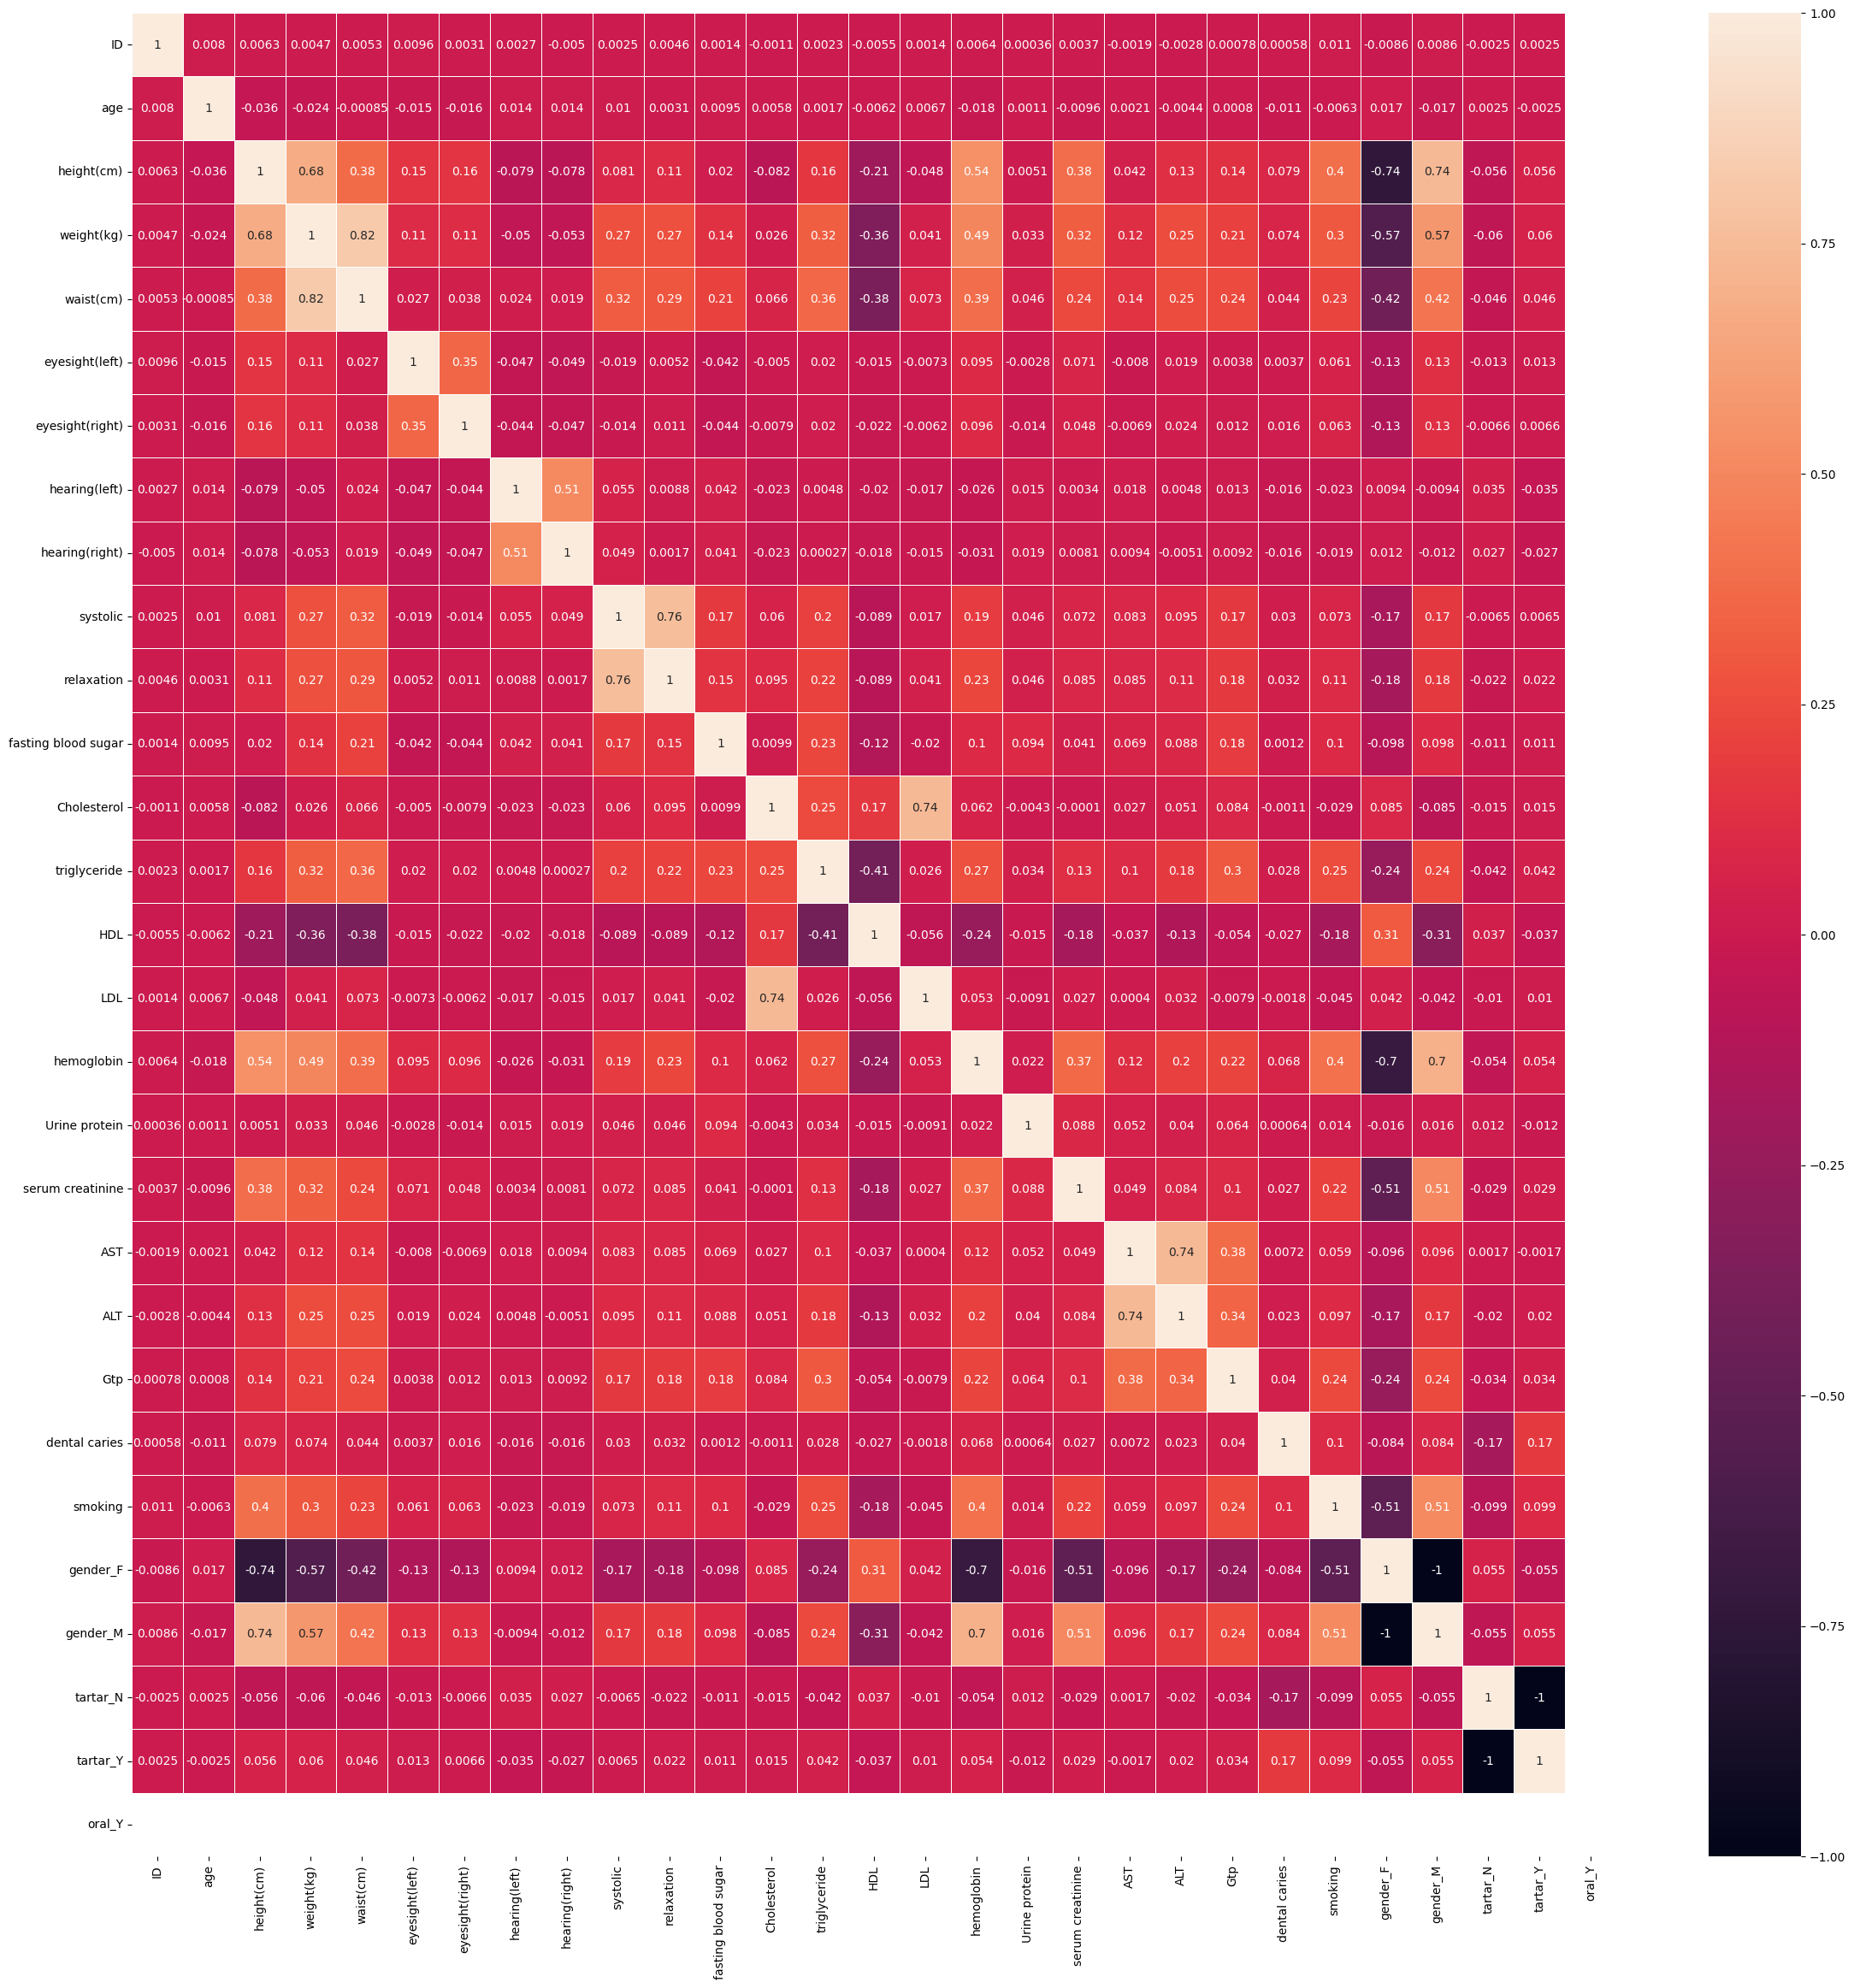

In [ ]:
plt.figure(figsize=(28,28))
sns.heatmap(mat_corr, annot=True, linewidth=0.5 ,linecolor="White")

On aurait pu enlever les variables avec le moins de corrélattions pour optimiser le dataset.

Suite 1.4 :

Les valeurs les plus corrélés entre elle sont :

- Taille et genrder_M
- AST et ALT
- gender_M et hemoglobin

Les variables les plus corrélés à la variables cibles fumeurs sont :
- gender_M
- hemoglobin
- height(cm)

Partie 3 : Logistic Regression

In [ ]:
X = df2.drop('smoking',axis=1)
y=df2['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

En utilisant la fonction train_test_split on a comme partition:

80% pour l'entrainement
20% pour le test

Il faut séparer le dataset pour que le modèle sois assez sensible sans pour autatn être trop spécifique

In [ ]:

clf = LogisticRegression(random_state=0, solver='saga', max_iter=1000).fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
clf.score(X_test, y_test)

0.6894075403949731

On test pour KNN:

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=neigh.predict(X_test)
confusion_mat_result = confusion_matrix(y_pred, y_test)
accuracy_score(y_test, y_pred)

0.812657091561939

On test pour un arbre de décision :

In [ ]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.7683123877917415

On test pour un RandomTree :

In [ ]:
clf3 = RandomForestClassifier( random_state=0)
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)


0.8324955116696588

On test pour Gradiant Boosting Classifier:

In [ ]:
clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7638240574506283

On cherche maitenant à optimiser les hyperparamètre:

Regression Logistic

In [ ]:
clf=LogisticRegression()
h_parameters_clf={
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300, 400,500],
    'solver': ['liblinear', 'lbfgs']

}
grid_search_clf = GridSearchCV(estimator=clf, param_grid=h_parameters_clf, cv=5, scoring='accuracy')
grid_search_clf.fit(X_train, y_train)
best_model_clf = grid_search_clf.best_estimator_
pred_clf = best_model_clf.predict(X_test)
print(grid_search_clf.best_params_)
print(pred_clf)






/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO.

KNN :

In [11]:
param_grid_neigh = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid_neigh, cv=5, scoring='accuracy')
grid_search_neigh.fit(X_train, y_train)
print(grid_search_neigh.best_params_)
best_model_neigh = grid_search_neigh.best_estimator_
pred_neigh = best_model_neigh.predict(X_test)


KeyboardInterrupt: 

Je ne sais pas si c'est un problème de connection (je suis de retour dans ma campagne lyonnaise) mais les code pour déterminer les hypers paramètres n'aboutissent pas. Je peut donc pas effectuer de manière efficace le parameter tuning. Avec les éléments que je possède le modèle le plus efficace est le random tree.